In [1]:
from utils import ParquetDataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import scaling_functions, scaling_functions_inv

/work/gallim/mambaforge/envs/FFF-minimal/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cond_columns = ["probe_pt", "probe_eta", "probe_phi", "probe_fixedGridRhoAll"]
columns = ["probe_r9", "probe_s4", "probe_sieie", "probe_sieip", "probe_etaWidth", "probe_phiWidth"]

all_columns = cond_columns + columns

nevs = 100000
fl = "/work/gallim/devel/CQRRelatedStudies/NormalizingFlow/preprocess/preprocessed/data_eb_train.parquet"

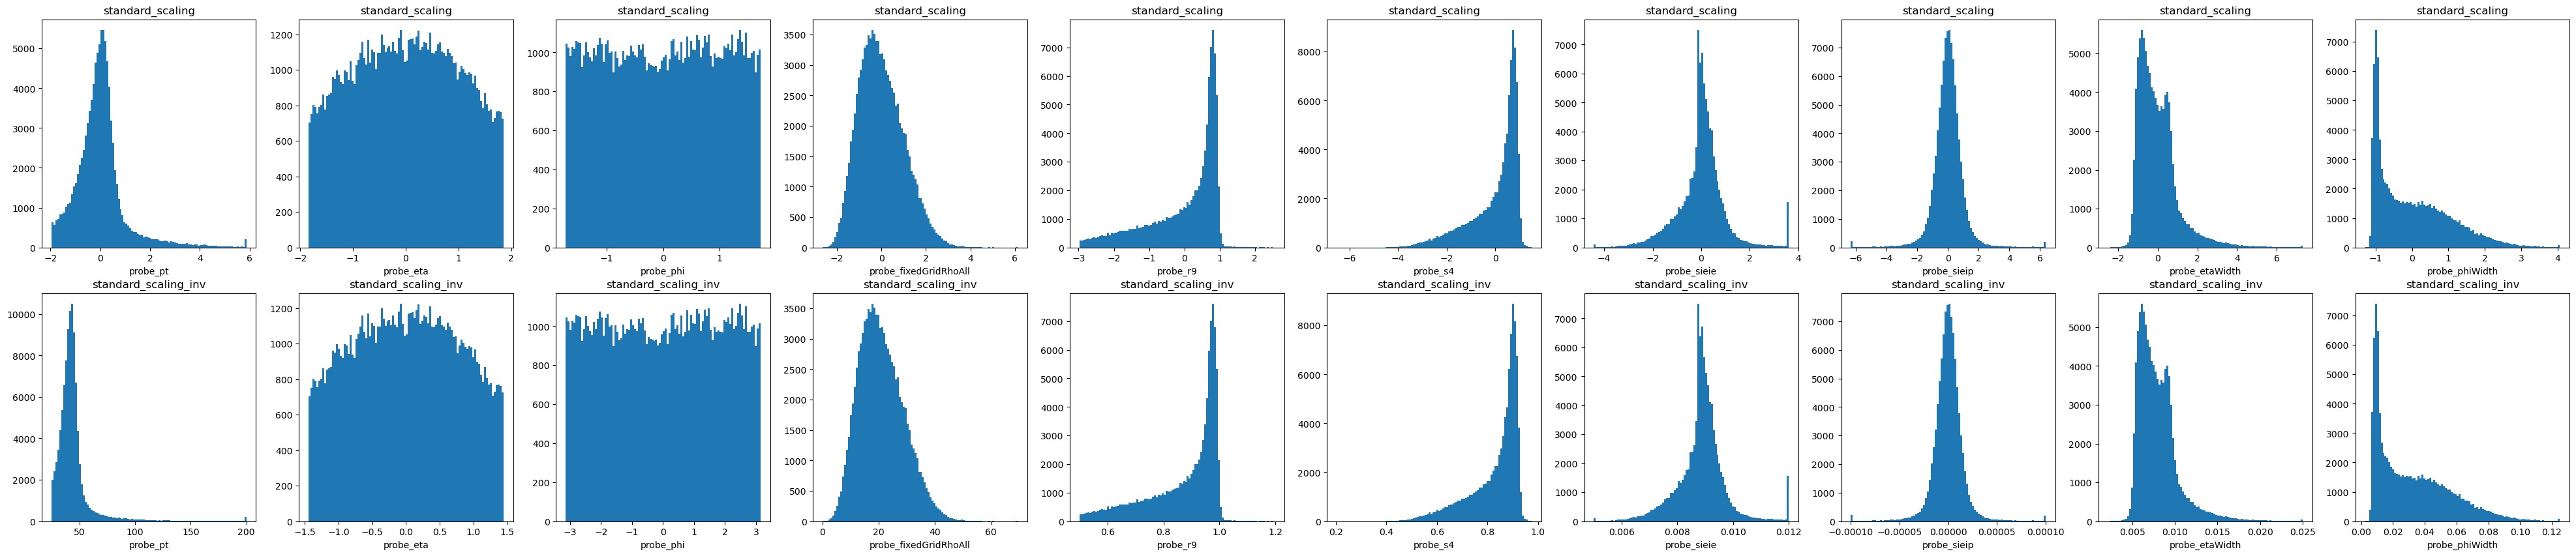

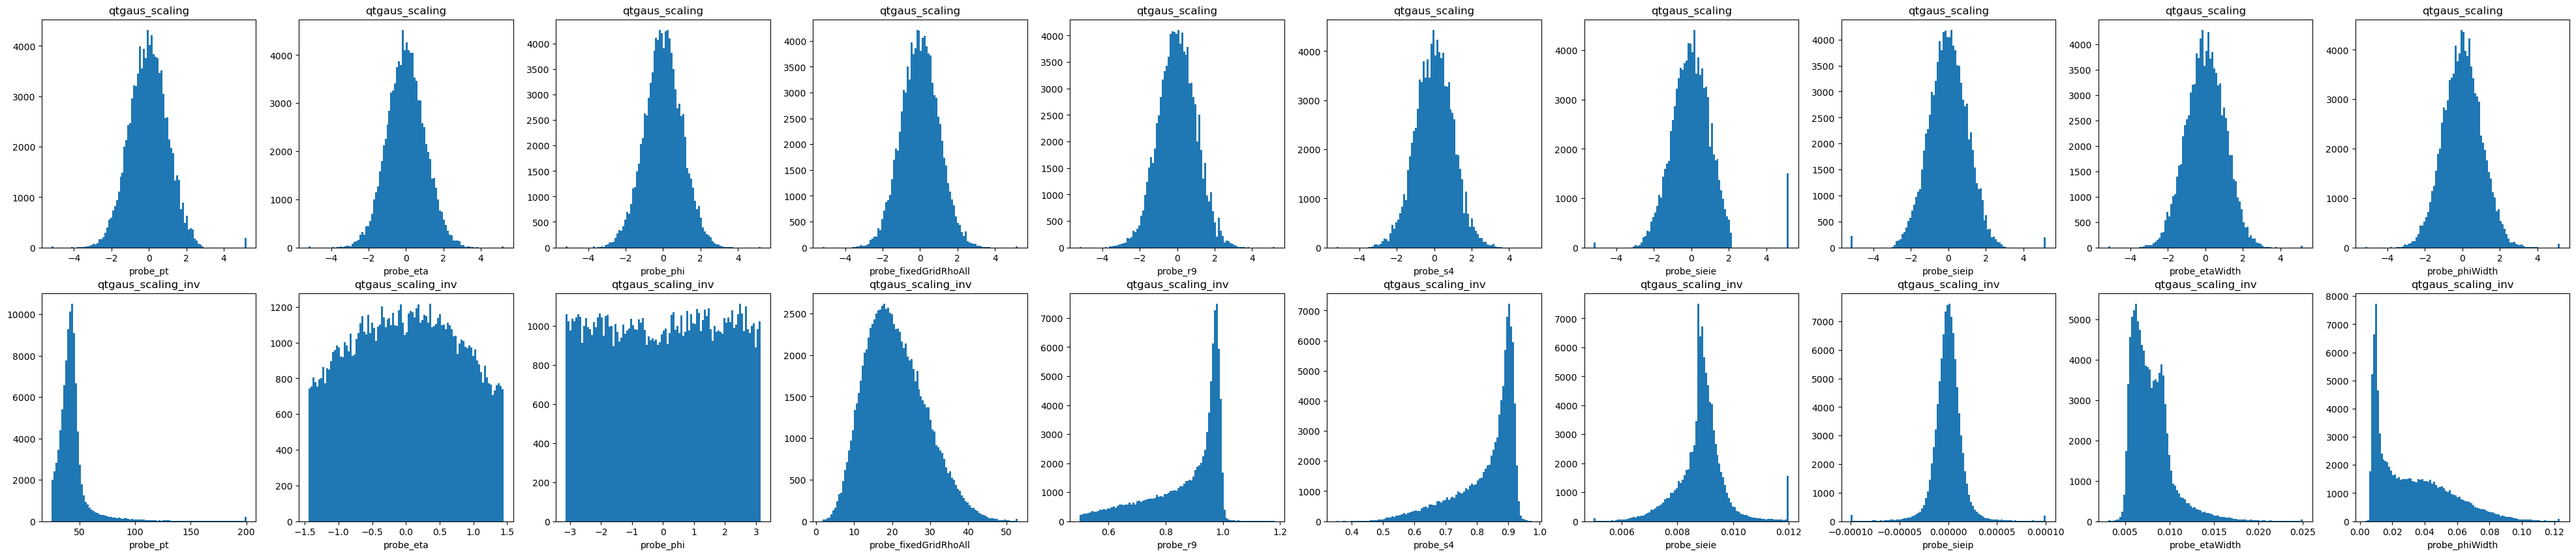

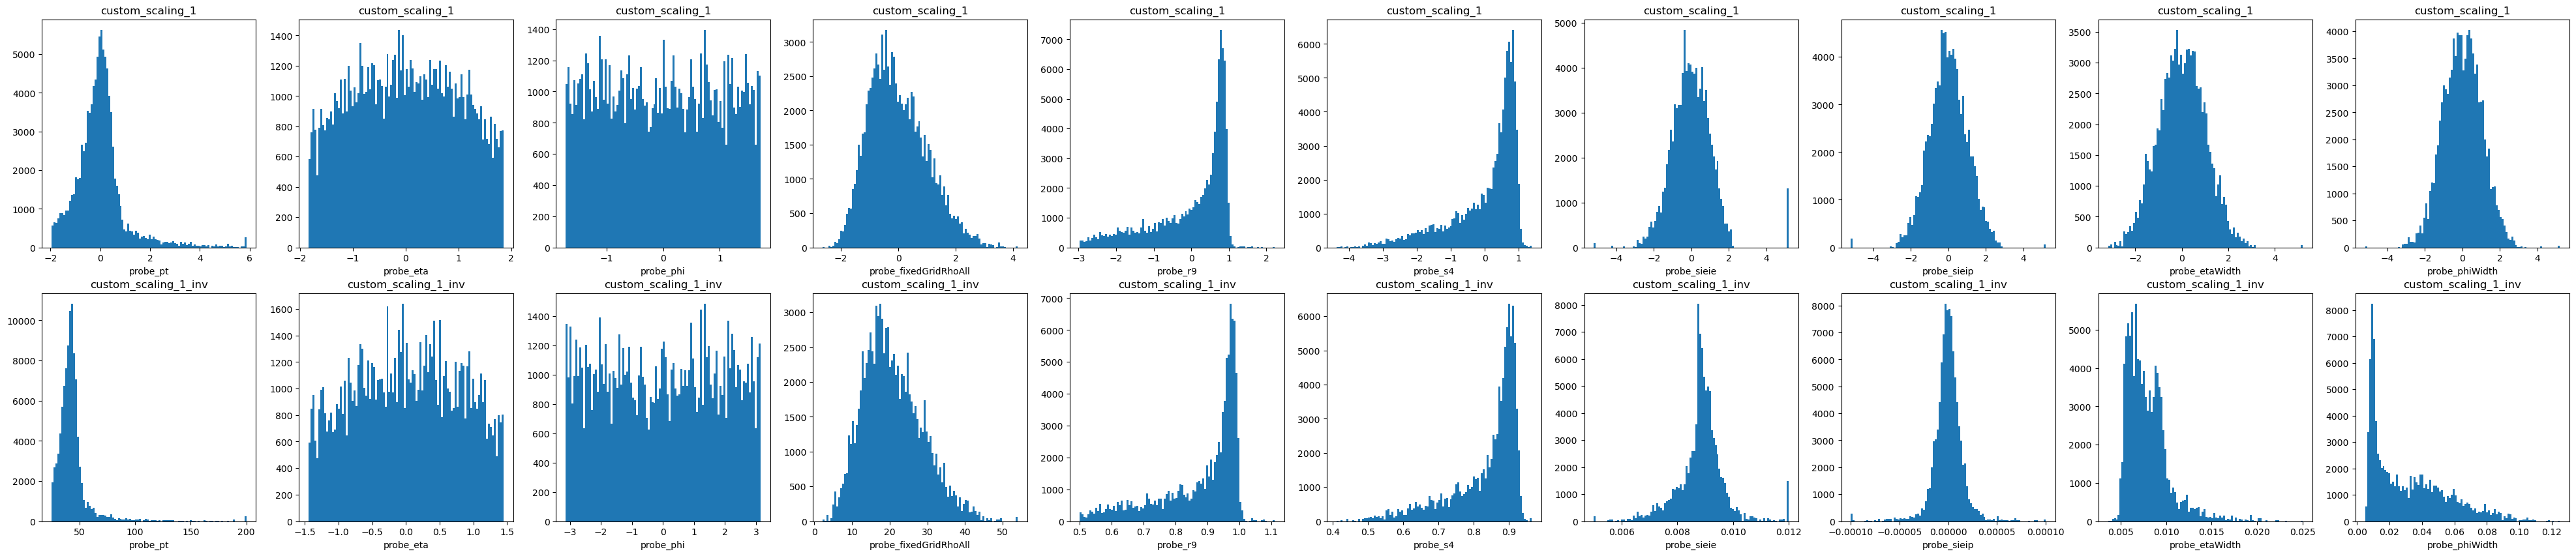

In [3]:
for i, (scaler_fun, scaler_fun_inv) in enumerate(zip(scaling_functions.keys(), scaling_functions_inv.keys())):
    fig, axs = plt.subplots(2, len(all_columns), figsize=(5*len(all_columns), 10))
    dataset = ParquetDataset(files=fl, columns=all_columns, nevs=nevs, scale_function=scaler_fun, inverse_scale_function=scaler_fun_inv)
    for j, col in enumerate(all_columns):
        axs[0, j].hist(dataset.df[col], bins=100)
        axs[0, j].set_xlabel(col)
        axs[0, j].set_title(scaler_fun)
    dataset.scale_back()
    for j, col in enumerate(all_columns):
        axs[1, j].hist(dataset.df[col], bins=100)
        axs[1, j].set_xlabel(col)
        axs[1, j].set_title(scaler_fun_inv)
    plt.show()